In [103]:
# import libraries needed for analysis
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify as sq
from functools import reduce

In [104]:
#Plot football pitch using matplotlib
def draw_pitch(ax):
    

    #Draw football pitch and halfway line
    plt.plot([0,0],[0,80], color="green")
    plt.plot([0,120],[80,80], color="green")
    plt.plot([120,120],[80,0], color="green")
    plt.plot([120,0],[0,0], color="green")
    plt.plot([60,60],[0,80], color="green")

    #Draw left side penalty area
    plt.plot([14.6,14.6],[57.8,22.2],color="green")
    plt.plot([0,14.6],[57.8,57.8],color="green")
    plt.plot([0,14.6],[22.2,22.2],color="green")

    #Draw right side penalty area
    plt.plot([120,105.4],[57.8,57.8],color="green")
    plt.plot([105.4,105.4],[57.8,22.5],color="green")
    plt.plot([120, 105.4],[22.5,22.5],color="green")

    #Draw left side 6 yard box
    plt.plot([0,4.9],[48,48],color="green")
    plt.plot([4.9,4.9],[48,32],color="green")
    plt.plot([0,4.9],[32,32],color="green")

    #Draw right side 6 yard box
    plt.plot([120,115.1],[48,48],color="green")
    plt.plot([115.1,115.1],[48,32],color="green")
    plt.plot([120,115.1],[32,32],color="green")

    #Create centre circle and spot
    centreCircle = plt.Circle((60,40),8.1,color="green",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="green")
    #Create left and right side penalty spot
    leftPenSpot = plt.Circle((9.7,40),0.71,color="green")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="green")

    #Draw circles created above
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

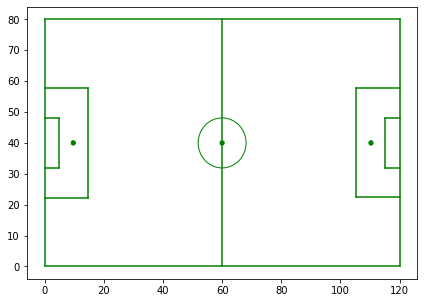

In [105]:
    #Plot football pitch
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.show()

In [106]:
#Analysing where it went wrong for england, against the mighty Belgium.
# loading the json file (downloaded from https://github.com/statsbomb/open-data/blob/master/data/events/7550.json)
with open('FootballAnalysis/7500.json') as data_file:    
    data = json.load(data_file)

In [107]:
#normalise json data 
df = json_normalize(data, sep = "_")
# get passing information of Dier
dier_pass = df[(df['type_name'] == "Pass") & (df['player_name']=='Eric Dier')] 
#Create general pass column and player specific pass df
pass_column = [i for i in df.columns if i.startswith("pass")]
dier_pass = dier_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
dier_pass.head()

,id,period,timestamp,location,pass_end_location,pass_recipient_name
51,1af3247c-ffa2-43e0-85c3-265c452282c3,1,00:01:08.360,"[76.0, 78.0]","[83.0, 80.0]",NaN
160,43a385dc-dbd8-44eb-9c8d-4daf18a9918a,1,00:03:03.000,"[26.0, 47.0]","[34.0, 10.0]",Gary Cahill
178,69f5ada5-3bff-48cd-9951-6adb5c25dc7c,1,00:03:36.920,"[82.0, 10.0]","[67.0, 43.0]",Phil Jones
188,c1d2248e-88b7-4bda-9a71-ce235dd29f02,1,00:03:46.000,"[71.0, 54.0]","[59.0, 57.0]",Phil Jones
396,f4478a4c-753f-49e6-844d-111faebb47df,1,00:08:24.000,"[34.0, 52.0]","[31.0, 10.0]",Gary Cahill


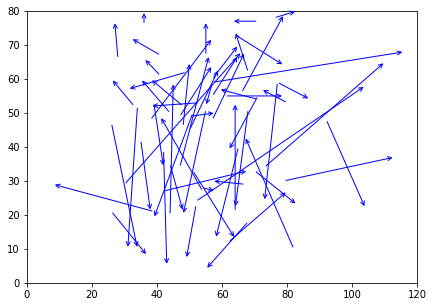

In [108]:
#Plot Diers passing
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,120])
ax.set_ylim([0,80])
for i in range(len(dier_pass)):
    color = "blue" if dier_pass.iloc[i]['period'] == 1 else "red"
    ax.annotate("", xy = (dier_pass.iloc[i]['pass_end_location'][0], dier_pass.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (dier_pass.iloc[i]['location'][0], dier_pass.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
plt.show()

In [109]:
# extract Dier's involvement throuhout the entire match
dier_action = df[(df['player_name']=='Eric Dier')][["id", "type_name","period", "timestamp", "location"]]
dier_action.head()

,id,type_name,period,timestamp,location
51,1af3247c-ffa2-43e0-85c3-265c452282c3,Pass,1,00:01:08.360,"[76.0, 78.0]"
66,b651bb06-f427-420c-ba33-bc81385853d1,Pressure,1,00:01:25.802,"[79.0, 75.0]"
87,e5858c40-418f-46b4-97ee-11ee95ef6600,Pressure,1,00:01:42.640,"[56.0, 54.0]"
158,b332d2cf-2dd8-4350-817f-6a46ba0524cb,Ball Receipt*,1,00:03:01.600,"[26.0, 47.0]"
159,655c7d14-c9fd-4c57-9086-a10f127f10ea,Carry,1,00:03:01.600,"[26.0, 47.0]"


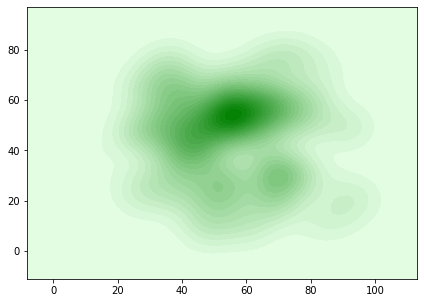

In [110]:
#Create heat map of Dier involvment throughout the match using seaborn
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

#Iterate through location co-ordinates
x_coord = [i[0] for i in sterling_action["location"]]
y_coord = [i[1] for i in sterling_action["location"]]

sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

In [111]:
#Create function to merge 
def heat_pass_map(data, player_name):
    pass_data = data[(data['type_name'] == "Pass") & (data['player_name'] == player_name)]
    action_data = data[(data['player_name']==player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(pass_data)):
        # differentiate half by different color
        color = "white" if pass_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (pass_data.iloc[i]['pass_end_location'][0], pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (pass_data.iloc[i]['location'][0], pass_data.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

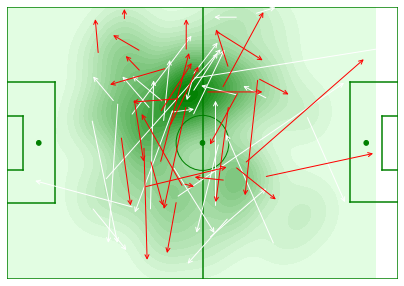

In [112]:
heat_pass_map(df, 'Eric Dier')

In [114]:
#Create function to merge 
def heat_shop_map(data, player_name):
    shot_data = data[(data['type_name'] == "Shot") & (data['player_name'] == player_name)]
    action_data = data[(data['player_name']==player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(shot_data)):
        # we also differentiate different half by different color
        color = "white" if shot_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (shot_data.iloc[i]['shot_end_location'][0], shot_data.iloc[i]['shot_end_location'][1]), xycoords = 'data',
               xytext = (shot_data.iloc[i]['location'][0], shot_data.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

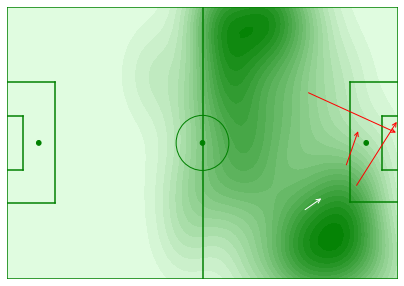

In [115]:
heat_shop_map(df, 'Marcus Rashford')

In [46]:
data_id = [7500, 7501, 7502, 7503, 7504, 7505, 7506]
#  read all the json files of matches and concatenate into a pre-defined dataframe
all_england = pd.DataFrame()
for i in data_id:
    with open('FootballAnalysis/'+str(i)+'.json') as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    if all_england.empty:
        all_england = df
    else:
        all_england = pd.concat([all_england, df], join = 'outer', sort = False)

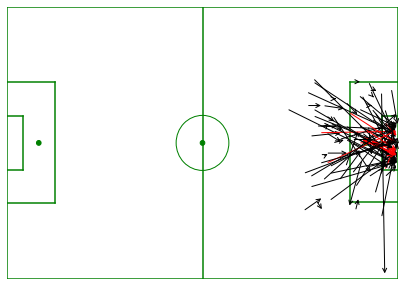

In [91]:
#Create an all shot data for england men
shot_data = all_england[(all_england['type_name'] == "Shot") & (all_england['team_name'] == 'England')]

fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')

for i in range(len(shot_data)):
    # differentiate between goals and misses by black and read
    color = "red" if shot_data.iloc[i]['shot_outcome_name'] == "Goal" else "black"
    ax.annotate("", xy = (shot_data.iloc[i]['shot_end_location'][0], shot_data.iloc[i]['shot_end_location'][1]), xycoords = 'data',
           xytext = (shot_data.iloc[i]['location'][0], shot_data.iloc[i]['location'][1]), textcoords = 'data',
           arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()

In [49]:
# focus on only half of the pitch
def draw_half_pitch(ax):
    #Pitch Outline & Centre Line
    Pitch = Rectangle([60,0], width = 60, height = 80, fill = False)
    #Right Penalty Area
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)

    #Right 6-yard Box
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = Arc((60,40),width = 8.1, height = 8.1, angle=0,theta1=270,theta2=90,color="black")
    centreSpot = plt.Circle((60,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, RightPenalty, RightSixYard, centreCircle, centreSpot, rightPenSpot, rightArc]
    for i in element:
        ax.add_patch(i)

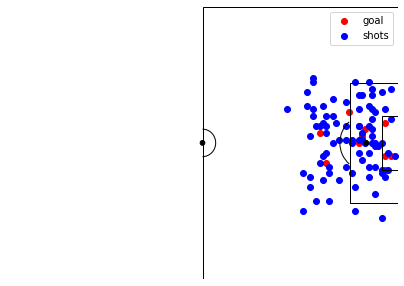

In [50]:
#Plot goals and shots as a scatter plot on half of the football pitch
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_half_pitch(ax)
plt.axis('off')
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord_goal, y_coord_goal, c = 'red', label = 'goal')
ax.scatter(x_coord, y_coord, c = 'blue', label = 'shots')
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

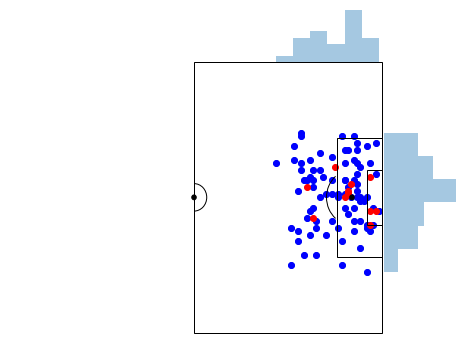

In [51]:
#Add historgam to see shot distribution 
joint_shot_chart = sns.jointplot(x_coord, y_coord, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5)
joint_shot_chart.fig.set_size_inches(7,5)
ax = joint_shot_chart.ax_joint
# overlaying the plot with a pitch
draw_half_pitch(ax)
ax.set_xlim(0.5,120.5)
ax.set_ylim(0.5,80.5)
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord, y_coord, c = 'b', label = 'shots')
ax.scatter(x_coord_goal, y_coord_goal, c = 'r', label = 'goal')
# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
joint_shot_chart.ax_marg_x.set_axis_off()
ax.set_axis_off()
plt.ylim(-.5, 80)
plt.axis('off')
plt.show()

In [93]:
#Doing the same but now for the Womxns world cup 2019
data_id = [22936, 22962, 68337, 68362, 69199, 69258, 69301]
# consequently read the json and concatenate into a pre-defined dataframe
all_englandWomxn = pd.DataFrame()
for i in data_id:
    with open('FootballAnalysis/womxn/'+str(i)+'.json') as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    if all_englandWomxn.empty:
        all_englandWomxn = df
    else:
        all_englandWomxn = pd.concat([all_englandWomxn, df], join = 'outer', sort = False)

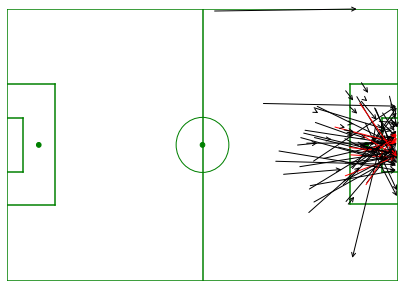

In [94]:
shot_dataWomxn = all_englandWomxn[(all_englandWomxn['type_name'] == "Shot") & (all_englandWomxn['team_name'] == "England Women's")]

fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')

for i in range(len(shot_dataWomxn)):
    # can also differentiate different half by different color
    color = "red" if shot_dataWomxn.iloc[i]['shot_outcome_name'] == "Goal" else "black"
    ax.annotate("", xy = (shot_dataWomxn.iloc[i]['shot_end_location'][0], shot_dataWomxn.iloc[i]['shot_end_location'][1]), xycoords = 'data',
           xytext = (shot_dataWomxn.iloc[i]['location'][0], shot_dataWomxn.iloc[i]['location'][1]), textcoords = 'data',
           arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()

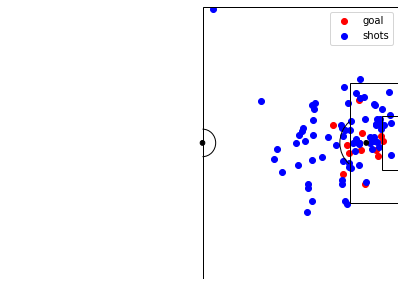

In [95]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_half_pitch(ax)
plt.axis('off')
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_dataWomxn["location"]) if shot_dataWomxn.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_dataWomxn["location"]) if shot_dataWomxn.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_dataWomxn["location"]) if shot_dataWomxn.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_dataWomxn["location"]) if shot_dataWomxn.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord_goal, y_coord_goal, c = 'red', label = 'goal')
ax.scatter(x_coord, y_coord, c = 'blue', label = 'shots')
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

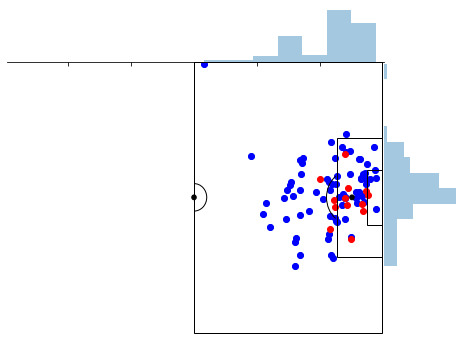

In [96]:
joint_shotWomxn_chart = sns.jointplot(x_coord, y_coord, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5)
joint_shotWomxn_chart.fig.set_size_inches(7,5)
ax = joint_shotWomxn_chart.ax_joint
# overlaying the plot with a pitch
draw_half_pitch(ax)
ax.set_xlim(0.5,120.5)
ax.set_ylim(0.5,80.5)
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_dataWomxn["location"]) if shot_dataWomxn.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_dataWomxn["location"]) if shot_dataWomxn.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_dataWomxn["location"]) if shot_dataWomxn.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_dataWomxn["location"]) if shot_dataWomxn.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord, y_coord, c = 'b', label = 'shots')
ax.scatter(x_coord_goal, y_coord_goal, c = 'r', label = 'goal')
# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
joint_shot_chart.ax_marg_x.set_axis_off()
ax.set_axis_off()
plt.ylim(-.5, 80)
plt.axis('off')
plt.show()